In [1]:
import firebase_admin
from firebase_admin import firestore
from firebase_admin import credentials
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", context="talk")

# Credentials pulled from file named in GOOGLE_APPLICATION_CREDENTIALS os env var
GOOGLE_APP_CREDS_PATH = '/Users/m_650704/Documents/pm-sensor-firebase-creds.json'
creds = credentials.Certificate(GOOGLE_APP_CREDS_PATH)
app = firebase_admin.initialize_app(creds)
db = firestore.client()

readings = db.collection(u'readings').order_by(u'time').stream()

In [2]:
values = [reading.to_dict() for reading in readings]

data = pd.DataFrame(values)

<IPython.core.display.Javascript object>


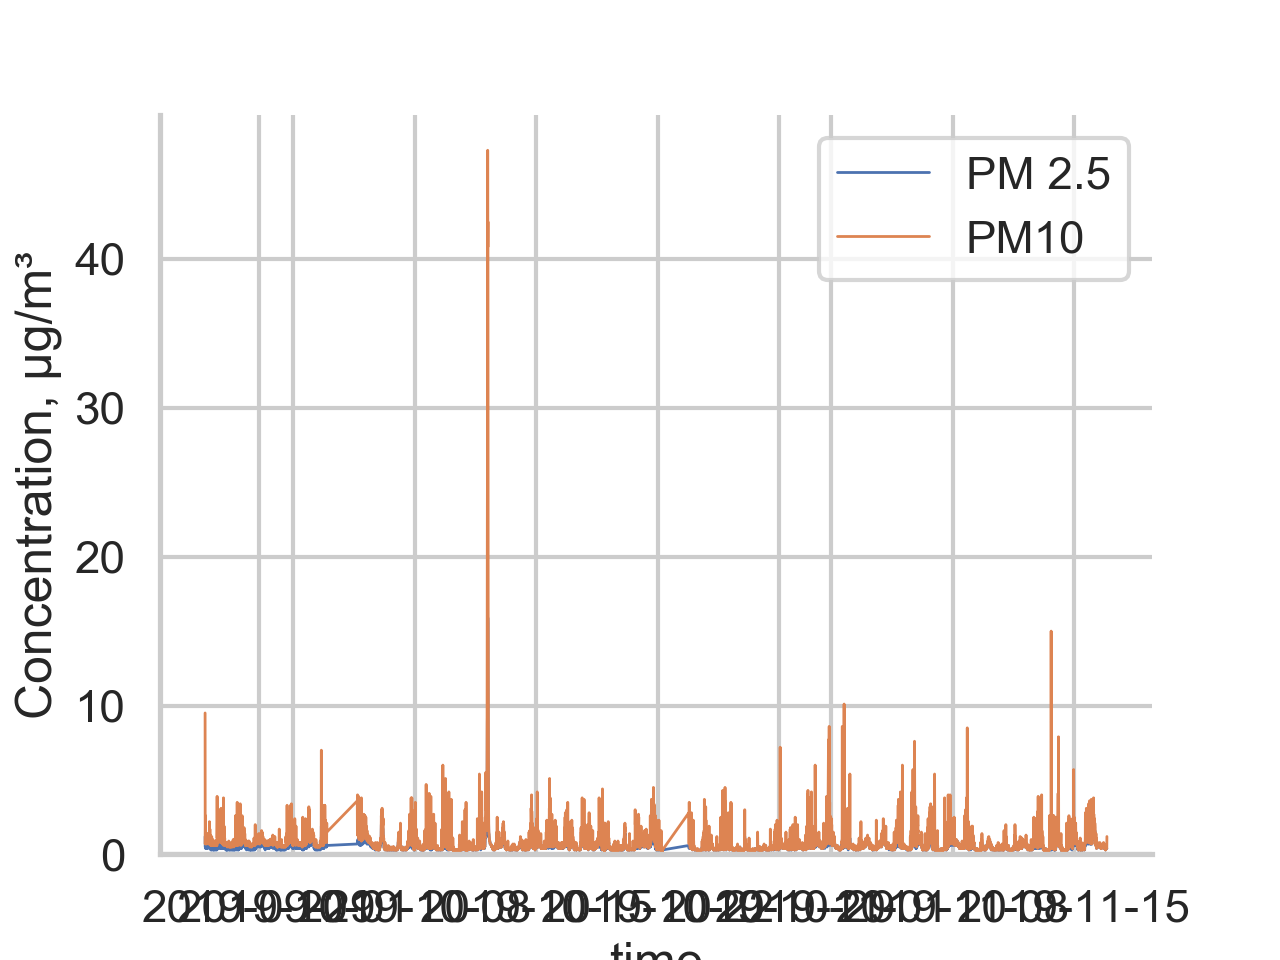

(0, 49.654999999999994)

In [5]:
%matplotlib notebook
sns.lineplot(x='time', y='pm2.5', data=data, linewidth=1)
sns.lineplot(x='time', y='pm10', data=data, linewidth=1)
sns.despine()
plt.legend(['PM 2.5', 'PM10'])
plt.ylabel('Concentration, μg/m³')
plt.ylim(0)

<IPython.core.display.Javascript object>


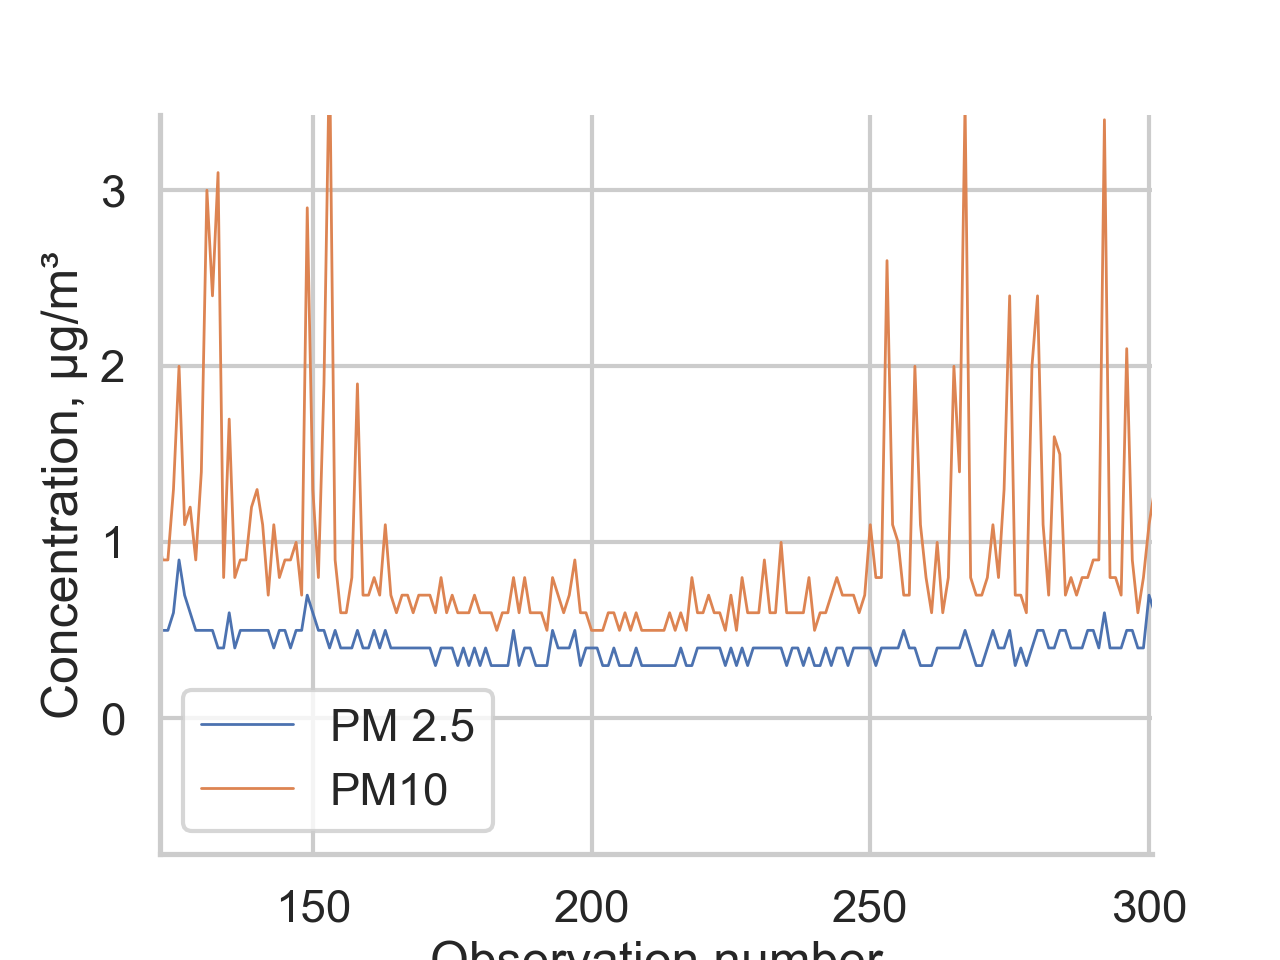

(0, 49.654999999999994)

In [7]:
%matplotlib notebook
sns.lineplot(data=data['pm2.5'], linewidth=1)
sns.lineplot(data=data['pm10'], linewidth=1)
sns.despine()
plt.legend(['PM 2.5', 'PM10'])
plt.ylabel('Concentration, μg/m³')
plt.xlabel('Observation number')
plt.ylim(0)

In [6]:
data.describe()

,pm2.5,pm10
count,7035.000000,7035.000000
mean,0.522473,0.858692
std,0.465719,1.397227
min,0.200000,0.200000
25%,0.400000,0.400000
50%,0.400000,0.600000
75%,0.600000,0.900000
max,15.900000,47.300000


In [9]:
data[180:240].describe()

,pm2.5,pm10
count,60.000000,60.000000
mean,0.356667,0.616667
std,0.059280,0.113745
min,0.300000,0.500000
25%,0.300000,0.500000
50%,0.400000,0.600000
75%,0.400000,0.600000
max,0.500000,1.000000
